## Data Loading with Your Column Names

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load data
df = pd.read_csv(r"C:/Users/HP/Desktop/Tenx_challenge_folder/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling-week-3-challenge/data/raw_data/MachineLearningRating_v3.csv", sep=';')

# Initial inspection
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2}. {col}")

print("\nData Types:")
print(df.dtypes.value_counts())

Dataset Shape: (1000098, 1)

Columns (1):
 1. UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims

Data Types:
object    1
Name: count, dtype: int64


## Data Cleaning & Type Conversion

In [50]:
# Convert date columns
date_cols = ['TransactionMonth', 'VehicleIntroDate']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert categorical columns
categorical_cols = [
    'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 
    'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 
    'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 
    'VehicleType', 'make', 'Model', 'bodytype', 'AlarmImmobiliser', 
    'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 
    'Converted', 'CrossBorder', 'CoverCategory', 'CoverType', 
    'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert numeric columns
numeric_cols = [
    'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 
    'NumberOfDoors', 'CustomValueEstimate', 'CapitalOutstanding',
    'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm',
    'ExcessSelected', 'TotalPremium', 'TotalClaims'
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("Data type conversion completed!")

Data type conversion completed!


## Data Quality Assessment

In [58]:
def check_data_quality(df):
    """
    Comprehensive data quality check with error handling
    """
    print("=" * 60)
    print("DATA QUALITY ASSESSMENT")
    print("=" * 60)
    
    # 1. Check missing values
    print("\n1. MISSING VALUES ANALYSIS")
    print("-" * 40)
    
    missing_data = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    })
    
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    if len(missing_data) > 0:
        print(f"Found {len(missing_data)} columns with missing values:")
        print(missing_data)
        
        # Show top 10 columns with highest missing percentage
        print("\nTop 10 columns with highest missing percentage:")
        print(missing_data.head(10))
    else:
        print("✓ No missing values found in any column!")
    
    # 2. Check for duplicate rows
    print("\n2. DUPLICATE ANALYSIS")
    print("-" * 40)
    
    duplicate_rows = df.duplicated().sum()
    print(f"Duplicate rows: {duplicate_rows}")
    
    if duplicate_rows > 0:
        print(f"Percentage of duplicate rows: {(duplicate_rows/len(df))*100:.2f}%")
    
    # 3. Check for duplicates in key ID columns
    print("\n3. UNIQUENESS OF KEY COLUMNS")
    print("-" * 40)
    
    # Try to find ID columns
    id_columns = []
    for col in df.columns:
        if 'id' in col.lower() or 'number' in col.lower() or 'code' in col.lower():
            id_columns.append(col)
    
    if not id_columns:
        # If no ID columns found, check common names
        common_ids = ['UnderwrittenCoverID', 'PolicyID', 'ID', 'CustomerID', 'PolicyNumber']
        id_columns = [col for col in common_ids if col in df.columns]
    
    if id_columns:
        print(f"Checking uniqueness of {len(id_columns)} ID columns:")
        for col in id_columns:
            total_count = len(df[col])
            unique_count = df[col].nunique()
            duplicate_count = df[col].duplicated().sum()
            uniqueness_percent = (unique_count / total_count) * 100
            
            print(f"  {col}:")
            print(f"    - Total: {total_count:,}")
            print(f"    - Unique: {unique_count:,} ({uniqueness_percent:.1f}%)")
            print(f"    - Duplicates: {duplicate_count:,}")
    else:
        print("No obvious ID columns found in the dataset")
    
    # 4. Data type summary
    print("\n4. DATA TYPE SUMMARY")
    print("-" * 40)
    
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    return missing_data

# Run the function
missing_summary = check_data_quality(df)

DATA QUALITY ASSESSMENT

1. MISSING VALUES ANALYSIS
----------------------------------------
✓ No missing values found in any column!

2. DUPLICATE ANALYSIS
----------------------------------------
Duplicate rows: 0

3. UNIQUENESS OF KEY COLUMNS
----------------------------------------
Checking uniqueness of 1 ID columns:
  UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims:
    - Total: 1,000,098
    -

## Key Metric Calculation

In [61]:
def calculate_key_metrics(df):
    """
    Calculate key insurance metrics with error handling
    """
    print("=" * 60)
    print("KEY METRICS CALCULATION")
    print("=" * 60)
    
    # Define column name mappings (adjust based on your actual column names)
    column_mapping = {
        'claims': 'TotalClaims',
        'premium': 'TotalPremium',
        'policy_id': 'PolicyID',
        'cover_id': 'UnderwrittenCoverID'
    }
    
    # Check which columns actually exist
    available_columns = {}
    for key, default_name in column_mapping.items():
        if default_name in df.columns:
            available_columns[key] = default_name
        else:
            # Try to find similar columns
            if key == 'claims':
                candidates = [col for col in df.columns if 'claim' in col.lower()]
            elif key == 'premium':
                candidates = [col for col in df.columns if 'premium' in col.lower()]
            elif key == 'policy_id':
                candidates = [col for col in df.columns if 'policy' in col.lower() and 'id' in col.lower()]
            elif key == 'cover_id':
                candidates = [col for col in df.columns if 'cover' in col.lower()]
            
            if candidates:
                available_columns[key] = candidates[0]
                print(f"Note: Using '{candidates[0]}' as {key} column")
    
    # Calculate Loss Ratio if we have both claims and premium
    if 'claims' in available_columns and 'premium' in available_columns:
        claims_col = available_columns['claims']
        premium_col = available_columns['premium']
        
        # Ensure columns are numeric
        df[claims_col] = pd.to_numeric(df[claims_col], errors='coerce')
        df[premium_col] = pd.to_numeric(df[premium_col], errors='coerce')
        
        # Calculate Loss Ratio
        df['LossRatio'] = df[claims_col] / df[premium_col]
        
        # Handle division by zero and infinite values
        df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)
        
        print(f"\n1. LOSS RATIO ANALYSIS")
        print(f"   Overall Loss Ratio: {df['LossRatio'].mean():.2%}")
        print(f"   Median Loss Ratio: {df['LossRatio'].median():.2%}")
        print(f"   Std Dev of Loss Ratio: {df['LossRatio'].std():.4f}")
        
        # Premium and Claims totals
        print(f"\n2. FINANCIAL TOTALS")
        print(f"   Total Premium: R{df[premium_col].sum():,.2f}")
        print(f"   Total Claims: R{df[claims_col].sum():,.2f}")
        print(f"   Net Profit/Loss: R{df[premium_col].sum() - df[claims_col].sum():,.2f}")
        
        # Distribution of Loss Ratio
        print(f"\n3. LOSS RATIO DISTRIBUTION")
        loss_ratio_stats = df['LossRatio'].describe()
        print(f"   Min: {loss_ratio_stats['min']:.2%}")
        print(f"   25%: {loss_ratio_stats['25%']:.2%}")
        print(f"   50%: {loss_ratio_stats['50%']:.2%}")
        print(f"   75%: {loss_ratio_stats['75%']:.2%}")
        print(f"   Max: {loss_ratio_stats['max']:.2%}")
        
        # Count of policies with high loss ratio (>100%)
        high_risk = df[df['LossRatio'] > 1.0].shape[0]
        high_risk_percent = (high_risk / len(df)) * 100
        print(f"\n4. HIGH-RISK POLICIES (Loss Ratio > 100%)")
        print(f"   Count: {high_risk:,} policies")
        print(f"   Percentage: {high_risk_percent:.1f}%")
    else:
        print("\nERROR: Could not calculate Loss Ratio")
        if 'claims' not in available_columns:
            print("   Missing claims column")
        if 'premium' not in available_columns:
            print("   Missing premium column")
    
    # Policy and Cover counts
    print(f"\n5. PORTFOLIO SIZE")
    if 'policy_id' in available_columns:
        policy_col = available_columns['policy_id']
        policy_count = df[policy_col].nunique()
        print(f"   Number of Unique Policies: {policy_count:,}")
    else:
        print("   Policy ID column not found")
    
    if 'cover_id' in available_columns:
        cover_col = available_columns['cover_id']
        cover_count = df[cover_col].nunique()
        print(f"   Number of Unique Covers: {cover_count:,}")
    else:
        print("   Cover ID column not found")
    
    print(f"   Total Records in Dataset: {len(df):,}")
    
    return df

# Run the function
df = calculate_key_metrics(df)

KEY METRICS CALCULATION
Note: Using 'UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims' as claims column
Note: Using 'UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bod

## Univariate Analysis - Numerical Variables

NUMERICAL VARIABLES ANALYSIS

Found 2 numerical columns to analyze

1. DESCRIPTIVE STATISTICS
----------------------------------------
Summary Statistics:


,count,mean,std,cv,min,25%,50%,75%,max,range,iqr,skew,kurtosis
UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims,0.0,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
LossRatio,0.0,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN



2. DISTRIBUTION VISUALIZATIONS
----------------------------------------


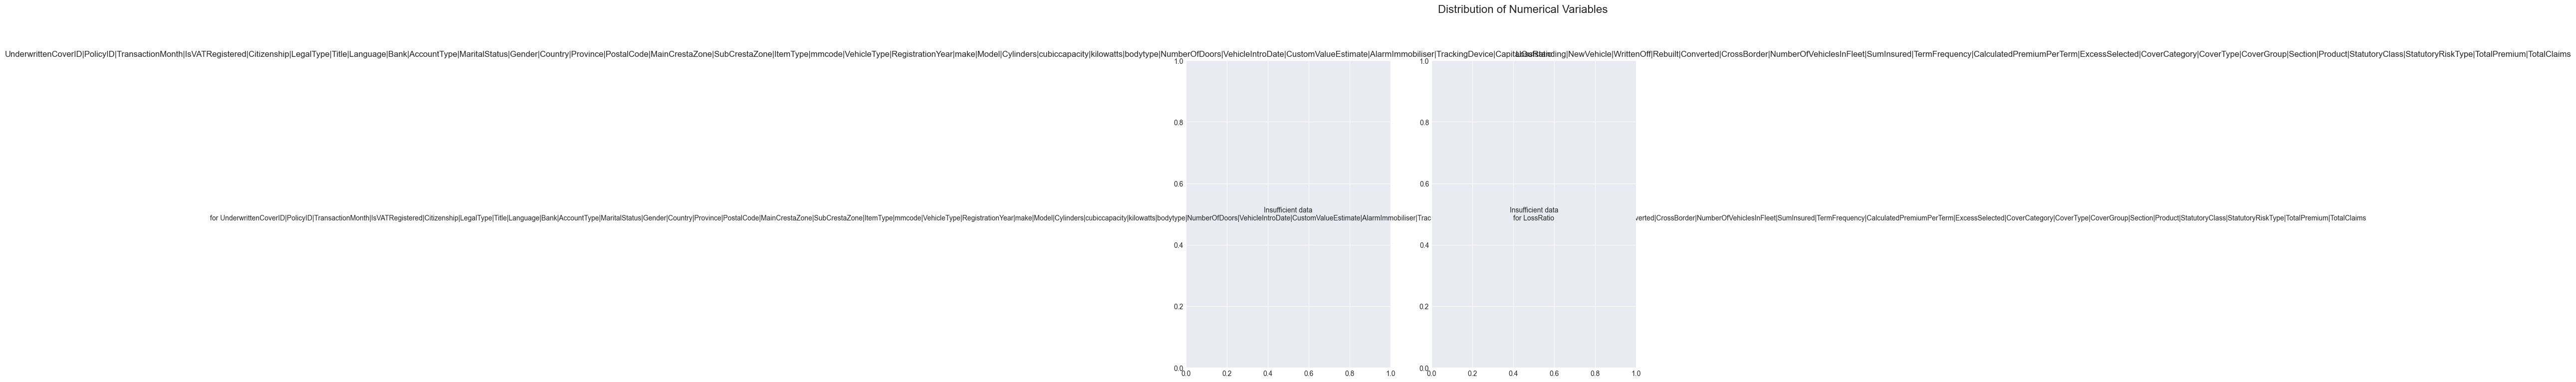


✓ Distribution plots saved to 'outputs/numerical_distributions.png'


In [64]:
def analyze_numerical_variables(df, custom_numerical_cols=None):
    """
    Analyze numerical variables with descriptive statistics and distributions
    
    Parameters:
    -----------
    df : pandas DataFrame
    custom_numerical_cols : list, optional
        Custom list of numerical columns to analyze
    """
    print("=" * 60)
    print("NUMERICAL VARIABLES ANALYSIS")
    print("=" * 60)
    
    # If custom columns provided, use them
    if custom_numerical_cols:
        key_numerical = [col for col in custom_numerical_cols if col in df.columns]
    else:
        # Automatically detect numerical columns
        numerical_dtypes = ['int64', 'float64', 'int32', 'float32']
        key_numerical = df.select_dtypes(include=numerical_dtypes).columns.tolist()
    
    print(f"\nFound {len(key_numerical)} numerical columns to analyze")
    
    if len(key_numerical) == 0:
        print("No numerical columns found!")
        return
    
    # 1. DESCRIPTIVE STATISTICS
    print("\n1. DESCRIPTIVE STATISTICS")
    print("-" * 40)
    
    try:
        desc_stats = df[key_numerical].describe().T
        
        # Calculate additional statistics
        desc_stats['cv'] = desc_stats['std'] / desc_stats['mean']  # Coefficient of Variation
        desc_stats['range'] = desc_stats['max'] - desc_stats['min']
        desc_stats['iqr'] = desc_stats['75%'] - desc_stats['25%']
        desc_stats['skew'] = df[key_numerical].skew()
        desc_stats['kurtosis'] = df[key_numerical].kurtosis()
        
        # Format for better display
        formatted_stats = desc_stats.copy()
        for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'iqr']:
            if col in formatted_stats.columns:
                formatted_stats[col] = formatted_stats[col].apply(lambda x: f"{x:,.2f}")
        
        print("Summary Statistics:")
        display_cols = ['count', 'mean', 'std', 'cv', 'min', '25%', '50%', '75%', 'max', 'range', 'iqr', 'skew', 'kurtosis']
        display_cols = [col for col in display_cols if col in formatted_stats.columns]
        display(formatted_stats[display_cols])
        
    except Exception as e:
        print(f"Error calculating descriptive statistics: {e}")
    
    # 2. DISTRIBUTION VISUALIZATIONS
    print("\n2. DISTRIBUTION VISUALIZATIONS")
    print("-" * 40)
    
    try:
        # Calculate number of rows needed
        num_cols = len(key_numerical)
        cols_per_row = 3
        num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Ceiling division
        
        fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, 8*num_rows))
        
        # Flatten axes array if needed
        if num_rows == 1:
            axes = [axes] if cols_per_row == 1 else axes
        else:
            axes = axes.flatten()
        
        for idx, col in enumerate(key_numerical):
            ax = axes[idx]
            
            # Get data
            data = df[col].dropna()
            
            if len(data) > 1:
                # Remove extreme outliers for better visualization
                Q1 = data.quantile(0.25)
                Q3 = data.quantile(0.75)
                IQR = Q3 - Q1
                
                # Use 3*IQR for visualization (shows more data)
                lower_bound = Q1 - 3 * IQR
                upper_bound = Q3 + 3 * IQR
                filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
                
                # Calculate bins using Freedman-Diaconis rule
                if len(filtered_data) > 1:
                    iqr_filtered = filtered_data.quantile(0.75) - filtered_data.quantile(0.25)
                    bin_width = 2 * iqr_filtered / (len(filtered_data) ** (1/3))
                    bins = int((filtered_data.max() - filtered_data.min()) / bin_width) if bin_width > 0 else 30
                    bins = min(bins, 50)  # Cap at 50 bins
                else:
                    bins = 30
                
                # Plot histogram
                n, bins, patches = ax.hist(filtered_data, bins=bins, edgecolor='black', alpha=0.7)
                ax.set_title(f'{col}', fontsize=12, pad=10)
                ax.set_xlabel('Value', fontsize=10)
                ax.set_ylabel('Frequency', fontsize=10)
                ax.grid(True, alpha=0.3)
                
                # Add statistics lines
                mean_val = data.mean()
                median_val = data.median()
                
                ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
                ax.axvline(median_val, color='green', linestyle=':', linewidth=1.5, alpha=0.8)
                
                # Add text with statistics
                stats_text = f'n = {len(data):,}\nMean = {mean_val:,.2f}\nMed = {median_val:,.2f}\nSD = {data.std():,.2f}'
                ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                       fontsize=8, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
                
                # Add legend
                ax.legend([f'Mean: {mean_val:,.2f}', f'Median: {median_val:,.2f}'], 
                         fontsize=8, loc='upper right')
            else:
                ax.text(0.5, 0.5, f'Insufficient data\nfor {col}', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f'{col}', fontsize=12)
        
        # Hide unused subplots
        for idx in range(len(key_numerical), len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)
        plt.tight_layout()
        
        # Save figure
        import os
        os.makedirs('outputs', exist_ok=True)
        plt.savefig('outputs/numerical_distributions.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n✓ Distribution plots saved to 'outputs/numerical_distributions.png'")
        
    except Exception as e:
        print(f"Error creating visualizations: {e}")
    
    return desc_stats if 'desc_stats' in locals() else None

# Run the function
desc_stats = analyze_numerical_variables(df)

## Univariate Analysis - Categorical Variables

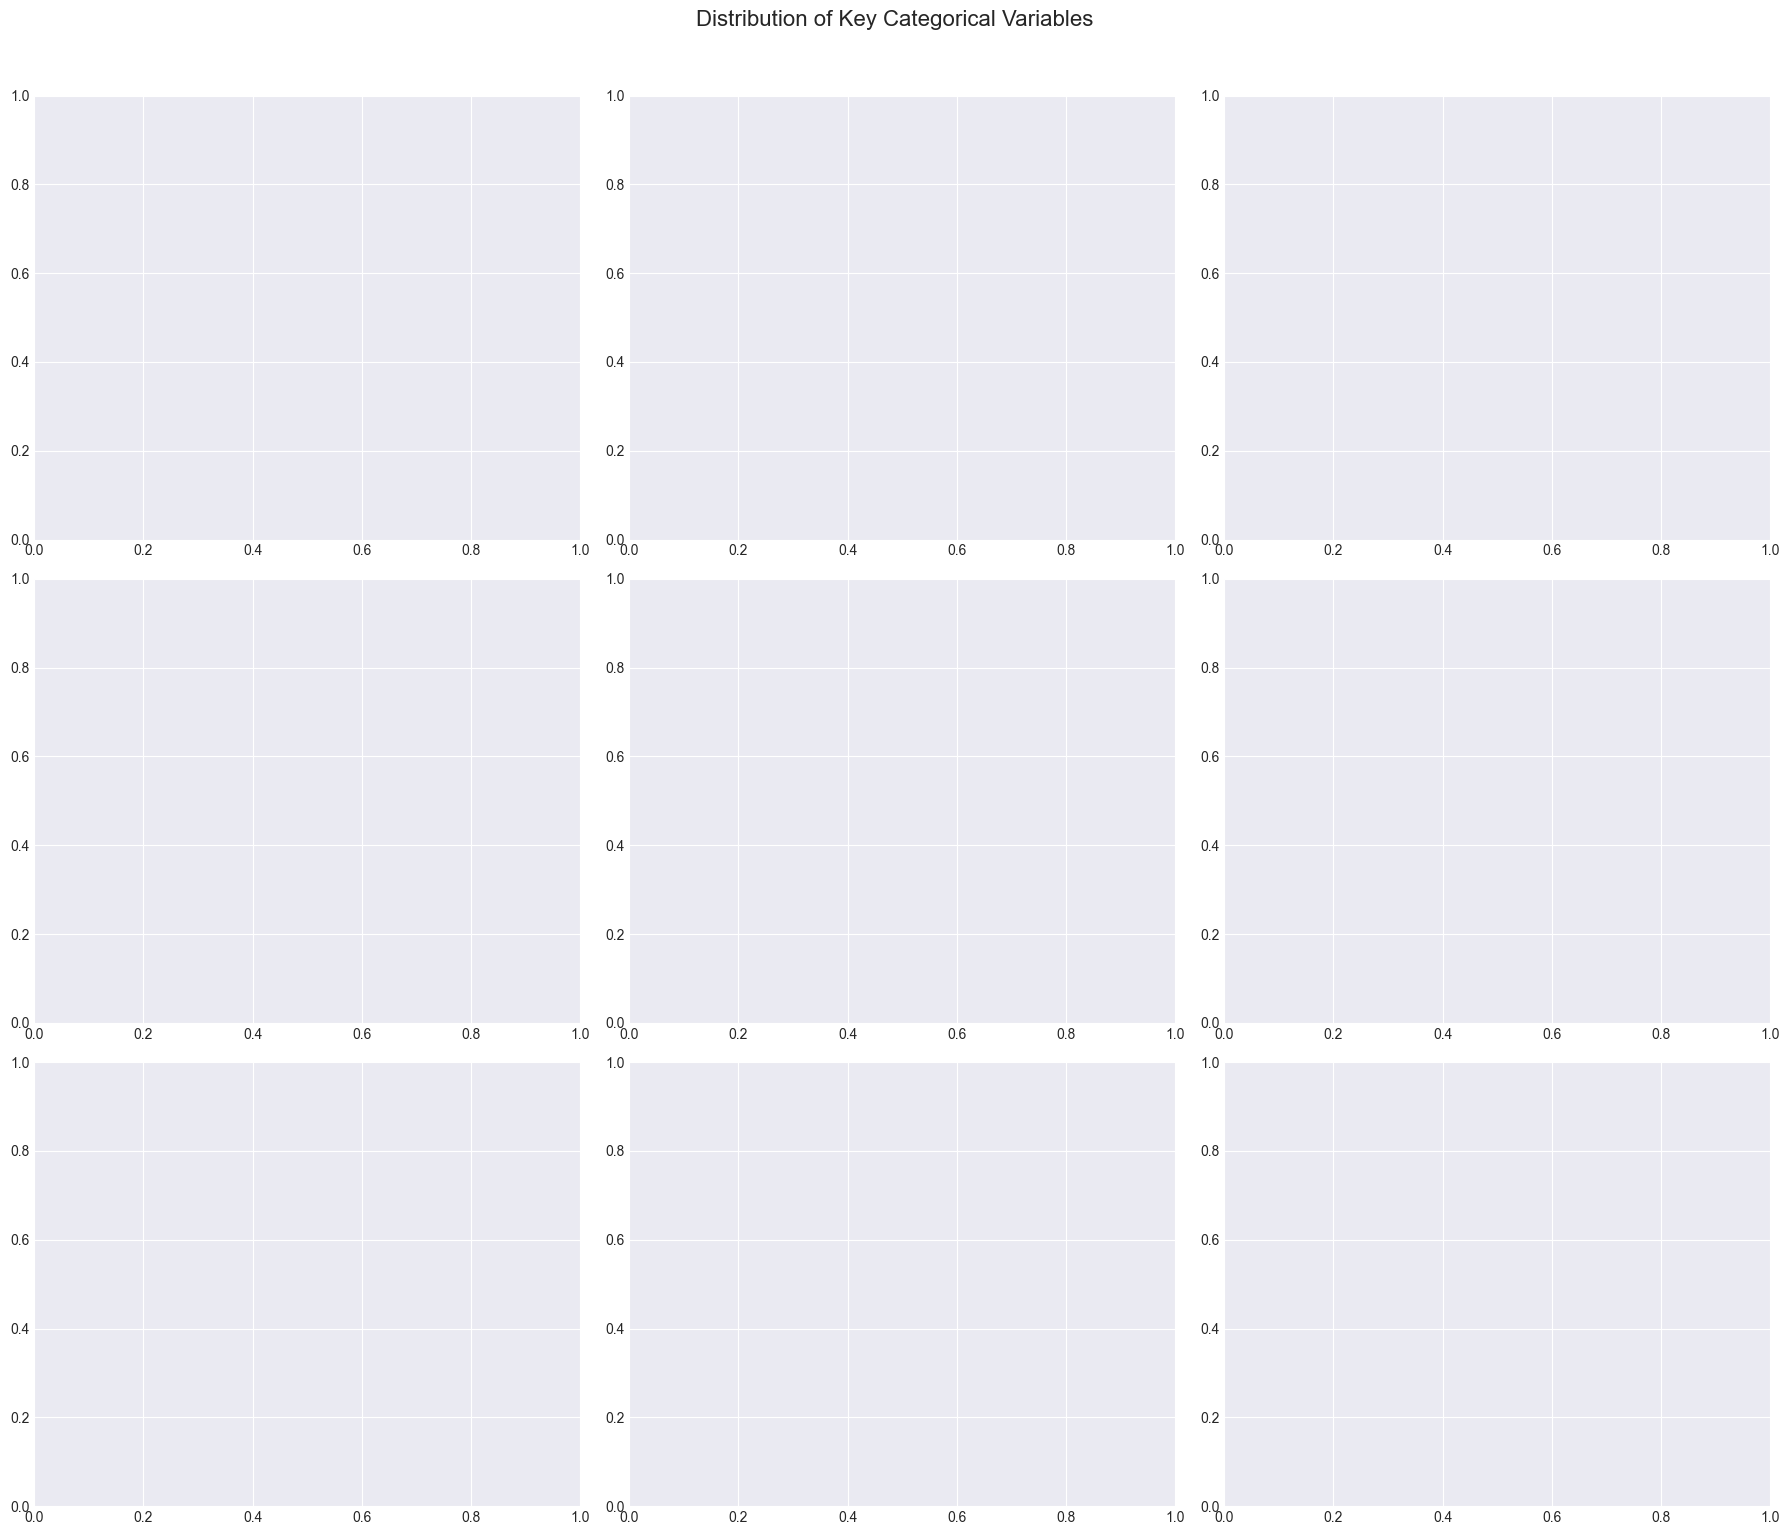

In [66]:
# Analyze top categorical variables
key_categorical = [
    'Province', 'VehicleType', 'Gender', 'CoverType', 
    'make', 'LegalType', 'MaritalStatus'
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(key_categorical[:9]):
    if col in df.columns:
        top_categories = df[col].value_counts().head(10)
        colors = plt.cm.tab20c(np.arange(len(top_categories)) / len(top_categories))
        
        bars = axes[idx].bar(range(len(top_categories)), top_categories.values, color=colors)
        axes[idx].set_title(f'Top 10 {col}', fontsize=12)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].set_xticks(range(len(top_categories)))
        axes[idx].set_xticklabels(top_categories.index, rotation=45, ha='right', fontsize=9)
        
        # Add count labels on bars
        for bar, count in zip(bars, top_categories.values):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                         f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.suptitle('Distribution of Key Categorical Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('outputs/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## Bivariate Analysis - Correlation Matrix

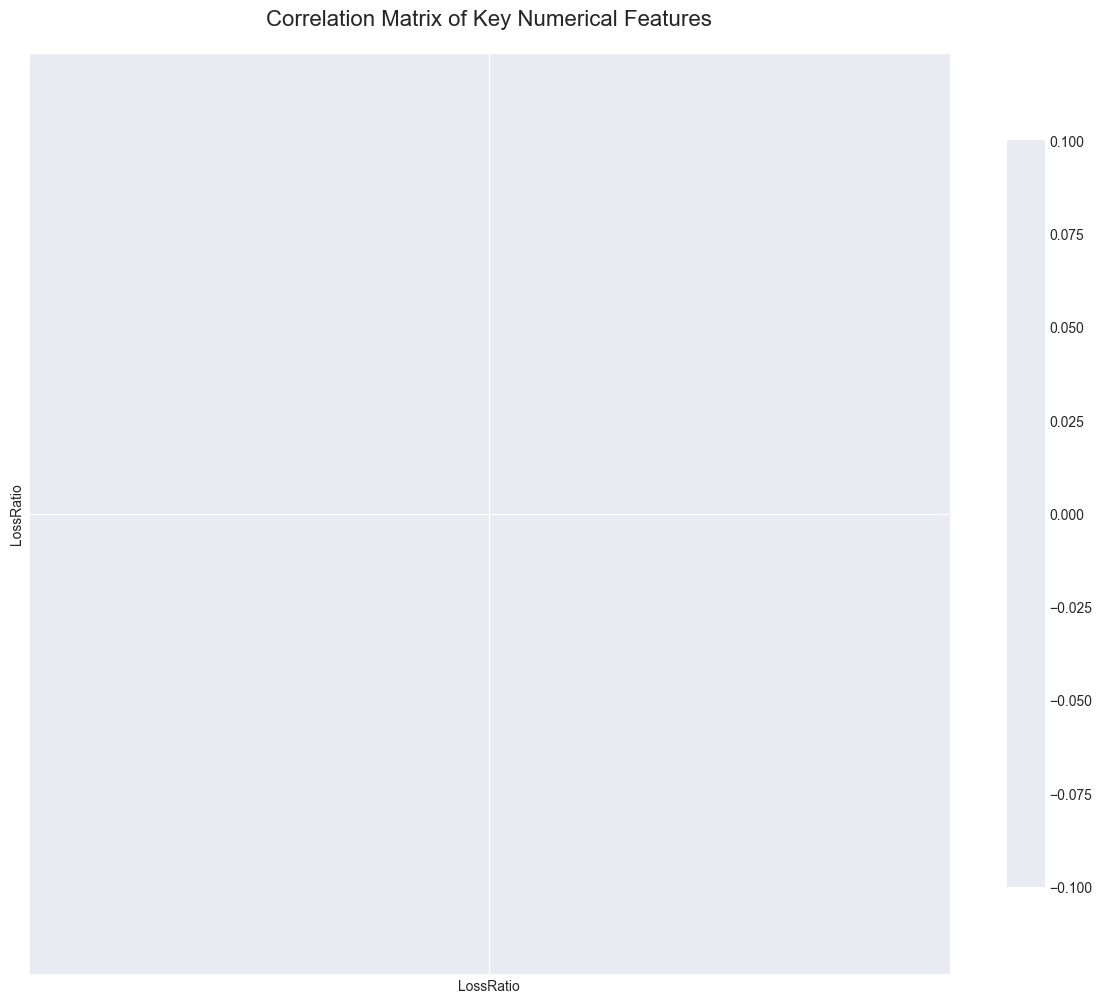

Key Correlations (> |0.5|):
Series([], dtype: float64)


In [67]:
# Select numerical columns for correlation
correlation_cols = [
    'TotalPremium', 'TotalClaims', 'CustomValueEstimate', 
    'SumInsured', 'CalculatedPremiumPerTerm', 'ExcessSelected',
    'cubiccapacity', 'kilowatts', 'LossRatio'
]

# Filter columns that exist in dataframe
correlation_cols = [col for col in correlation_cols if col in df.columns]

# Calculate correlation matrix
corr_matrix = df[correlation_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Key Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print key correlations
print("Key Correlations (> |0.5|):")
high_corr = corr_matrix.unstack().sort_values(key=lambda x: abs(x), ascending=False)
high_corr = high_corr[high_corr != 1.0]  # Remove self-correlations
print(high_corr[abs(high_corr) > 0.5].head(10))

## Geographical Analysis by Province & Postal Code

In [68]:
# Analysis by Province
if 'Province' in df.columns and 'PostalCode' in df.columns:
    # Province-level analysis
    province_stats = df.groupby('Province').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'nunique',
        'LossRatio': 'mean'
    }).sort_values('TotalPremium', ascending=False)
    
    province_stats['Avg_Premium_per_Policy'] = province_stats['TotalPremium'] / province_stats['PolicyID']
    province_stats['Avg_Claims_per_Policy'] = province_stats['TotalClaims'] / province_stats['PolicyID']
    
    print("Province-Level Analysis:")
    display(province_stats)
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Total Premium by Province
    axes[0, 0].bar(province_stats.index, province_stats['TotalPremium'] / 1e6, color='steelblue')
    axes[0, 0].set_title('Total Premium by Province (Millions)', fontsize=14)
    axes[0, 0].set_ylabel('Premium (R Millions)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Loss Ratio by Province
    colors = ['green' if x < 0.5 else 'orange' if x < 0.8 else 'red' for x in province_stats['LossRatio']]
    axes[0, 1].bar(province_stats.index, province_stats['LossRatio'], color=colors)
    axes[0, 1].set_title('Loss Ratio by Province', fontsize=14)
    axes[0, 1].set_ylabel('Loss Ratio')
    axes[0, 1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    axes[0, 1].axhline(y=0.8, color='gray', linestyle='--', alpha=0.5)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Policy Count by Province
    axes[1, 0].bar(province_stats.index, province_stats['PolicyID'], color='purple', alpha=0.7)
    axes[1, 0].set_title('Number of Policies by Province', fontsize=14)
    axes[1, 0].set_ylabel('Policy Count')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Premium vs Claims Scatter by Province
    scatter = axes[1, 1].scatter(province_stats['Avg_Premium_per_Policy'], 
                                 province_stats['Avg_Claims_per_Policy'],
                                 s=province_stats['PolicyID']/10,
                                 c=province_stats['LossRatio'],
                                 cmap='RdYlGn_r',
                                 alpha=0.8,
                                 edgecolors='black')
    
    # Add province labels
    for idx, row in province_stats.iterrows():
        axes[1, 1].annotate(idx, (row['Avg_Premium_per_Policy'], row['Avg_Claims_per_Policy']),
                           xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    axes[1, 1].set_title('Risk vs Return by Province', fontsize=14)
    axes[1, 1].set_xlabel('Average Premium per Policy')
    axes[1, 1].set_ylabel('Average Claims per Policy')
    plt.colorbar(scatter, ax=axes[1, 1], label='Loss Ratio')
    
    plt.suptitle('Geographical Analysis - Province Level', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('outputs/geographical_analysis_province.png', dpi=300, bbox_inches='tight')
    plt.show()

## Temporal Analysis (Monthly Trends)

In [69]:
if 'TransactionMonth' in df.columns:
    # Convert to datetime and extract month/year
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')
    
    # Monthly aggregation
    monthly_stats = df.groupby('YearMonth').agg({
        'TotalPremium': 'sum',
        'TotalClaims': 'sum',
        'PolicyID': 'nunique',
        'UnderwrittenCoverID': 'nunique'
    }).reset_index()
    
    monthly_stats['YearMonth'] = monthly_stats['YearMonth'].astype(str)
    monthly_stats['LossRatio'] = monthly_stats['TotalClaims'] / monthly_stats['TotalPremium']
    monthly_stats['Avg_Premium_per_Policy'] = monthly_stats['TotalPremium'] / monthly_stats['PolicyID']
    
    # Plot monthly trends
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Plot 1: Premium Trend
    axes[0, 0].plot(monthly_stats['YearMonth'], monthly_stats['TotalPremium'] / 1e6, 
                    marker='o', linewidth=2, markersize=6, color='blue')
    axes[0, 0].set_title('Monthly Total Premium (Millions)', fontsize=14)
    axes[0, 0].set_ylabel('Premium (R Millions)')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Claims Trend
    axes[0, 1].plot(monthly_stats['YearMonth'], monthly_stats['TotalClaims'] / 1e6,
                    marker='s', linewidth=2, markersize=6, color='red')
    axes[0, 1].set_title('Monthly Total Claims (Millions)', fontsize=14)
    axes[0, 1].set_ylabel('Claims (R Millions)')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Loss Ratio Trend
    axes[1, 0].plot(monthly_stats['YearMonth'], monthly_stats['LossRatio'],
                    marker='^', linewidth=2, markersize=6, color='green')
    axes[1, 0].set_title('Monthly Loss Ratio', fontsize=14)
    axes[1, 0].set_ylabel('Loss Ratio')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].axhline(y=monthly_stats['LossRatio'].mean(), color='gray', 
                      linestyle='--', label=f'Mean: {monthly_stats["LossRatio"].mean():.2f}')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Policy Count Trend
    axes[1, 1].plot(monthly_stats['YearMonth'], monthly_stats['PolicyID'],
                    marker='d', linewidth=2, markersize=6, color='purple')
    axes[1, 1].set_title('Monthly Policy Count', fontsize=14)
    axes[1, 1].set_ylabel('Number of Policies')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle('Temporal Trends - Monthly Analysis', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('outputs/temporal_trends_monthly.png', dpi=300, bbox_inches='tight')
    plt.show()

## Vehicle Make/Model Analysis

In [70]:
if 'make' in df.columns and 'Model' in df.columns:
    # Filter for makes with sufficient data
    make_counts = df['make'].value_counts()
    top_makes = make_counts[make_counts > 50].index.tolist()  # At least 50 records
    
    if len(top_makes) > 0:
        # Analysis for top makes
        make_analysis = df[df['make'].isin(top_makes)].groupby('make').agg({
            'TotalPremium': ['mean', 'sum', 'count'],
            'TotalClaims': ['mean', 'sum'],
            'CustomValueEstimate': 'mean',
            'LossRatio': 'mean'
        }).round(2)
        
        make_analysis.columns = ['_'.join(col).strip() for col in make_analysis.columns.values]
        make_analysis = make_analysis.sort_values('TotalPremium_sum', ascending=False)
        
        print("Top Vehicle Makes Analysis:")
        display(make_analysis.head(10))
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot 1: Top 10 Makes by Total Premium
        top_10_makes = make_analysis.head(10)
        axes[0].barh(range(len(top_10_makes)), top_10_makes['TotalPremium_sum'] / 1e6, 
                    color=plt.cm.Set3(np.arange(len(top_10_makes)) / len(top_10_makes)))
        axes[0].set_yticks(range(len(top_10_makes)))
        axes[0].set_yticklabels(top_10_makes.index)
        axes[0].set_xlabel('Total Premium (R Millions)')
        axes[0].set_title('Top 10 Vehicle Makes by Total Premium', fontsize=14)
        axes[0].invert_yaxis()
        
        # Plot 2: Loss Ratio by Make
        top_10_loss = make_analysis.sort_values('LossRatio_mean', ascending=False).head(10)
        colors = ['red' if x > 1.0 else 'orange' if x > 0.5 else 'green' for x in top_10_loss['LossRatio_mean']]
        axes[1].barh(range(len(top_10_loss)), top_10_loss['LossRatio_mean'], color=colors)
        axes[1].set_yticks(range(len(top_10_loss)))
        axes[1].set_yticklabels(top_10_loss.index)
        axes[1].set_xlabel('Loss Ratio')
        axes[1].set_title('Top 10 Makes by Loss Ratio (Highest)', fontsize=14)
        axes[1].axvline(x=0.5, color='gray', linestyle='--', alpha=0.5)
        axes[1].axvline(x=1.0, color='gray', linestyle='--', alpha=0.5)
        axes[1].invert_yaxis()
        
        plt.suptitle('Vehicle Make Analysis', fontsize=16, y=1.05)
        plt.tight_layout()
        plt.savefig('outputs/vehicle_make_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

## Outlier Detection

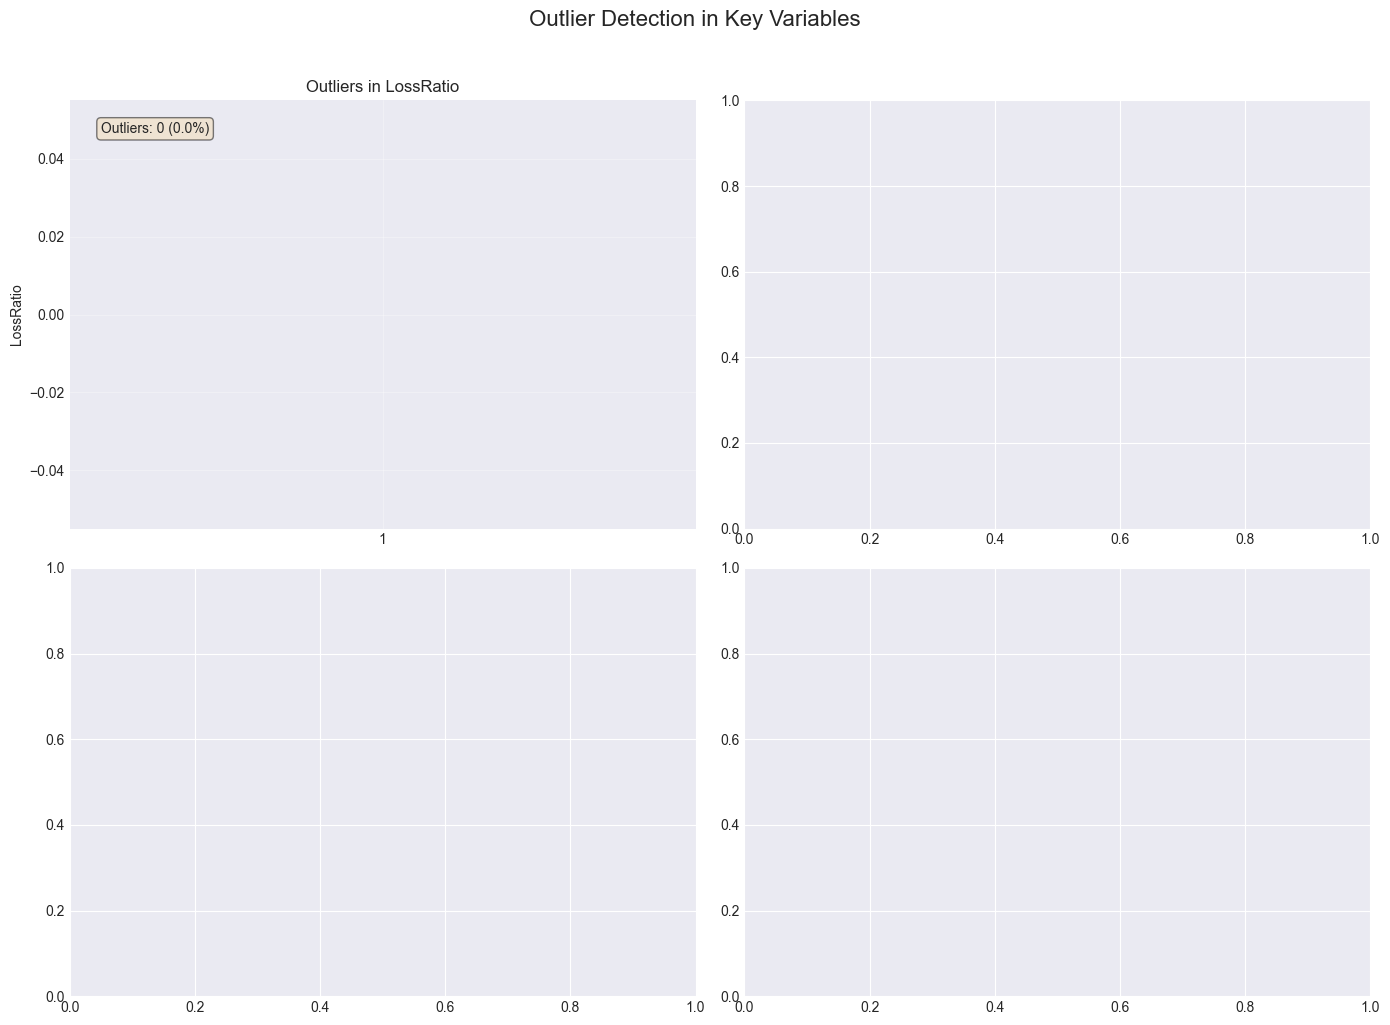

In [71]:
# Box plots for key numerical variables
outlier_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']
outlier_cols = [col for col in outlier_cols if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(outlier_cols[:4]):
    if col in df.columns:
        # Create box plot
        bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True, 
                              boxprops=dict(facecolor='lightblue'))
        
        # Color outliers
        for flier in bp['fliers']:
            flier.set(marker='o', color='red', alpha=0.5)
        
        axes[idx].set_title(f'Outliers in {col}', fontsize=12)
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
        
        # Calculate and display outlier statistics
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percent = (len(outliers) / len(df)) * 100
        
        axes[idx].text(0.05, 0.95, f'Outliers: {len(outliers):,} ({outlier_percent:.1f}%)',
                      transform=axes[idx].transAxes, fontsize=10,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Outlier Detection in Key Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('outputs/outlier_detection.png', dpi=300, bbox_inches='tight')
plt.show()

## Creative Visualizations

#### ( plot 1) Risk-Return Matrix by Vehicle Type & Province

In [91]:
# Let's first load your data properly
import pandas as pd
import numpy as np

# If you're loading from CSV, use the correct separator
try:
    # Try loading with pipe separator
    df = pd.read_csv('../data/raw_data/MachineLearningRating_v3.csv', sep='|')
    print("Successfully loaded with pipe separator")
except:
    # If that doesn't work, try loading and then splitting
    print("Trying alternative loading method...")
    df = pd.read_csv('your_data.csv')
    
    # Check if we need to split columns
    if df.shape[1] == 1:
        print("Data appears to be in single column - splitting...")
        
        # Get the first value to check structure
        first_val = df.iloc[0, 0]
        
        if isinstance(first_val, str) and '|' in first_val:
            # First row might be headers
            headers = first_val.split('|')
            
            # Process all rows
            data_rows = []
            for i in range(1, len(df)):  # Start from 1 to skip header
                row_val = df.iloc[i, 0]
                if isinstance(row_val, str):
                    row_data = row_val.split('|')
                    # Ensure we have the right number of columns
                    if len(row_data) == len(headers):
                        data_rows.append(row_data)
            
            # Create new DataFrame
            df = pd.DataFrame(data_rows, columns=headers)
            
            print(f"Created DataFrame with {df.shape[0]} rows and {df.shape[1]} columns")
        else:
            print("Data doesn't contain pipe separators")

# Now clean up column names
print("\nCleaning column names...")
df.columns = [col.strip() for col in df.columns]  # Remove whitespace

# Display cleaned columns
print(f"\nCleaned columns ({len(df.columns)} total):")
for i, col in enumerate(df.columns):
    print(f"{i+1:3}. {col}")

# Check for the columns we need
print("\n" + "="*60)
print("CHECKING FOR REQUIRED COLUMNS")
print("="*60)

required = ['VehicleType', 'Province', 'TotalClaims', 'TotalPremium']
found = []
missing = []

for col in required:
    if col in df.columns:
        found.append(col)
    else:
        missing.append(col)

print(f"Found: {found}")
print(f"Missing: {missing}")

# Look for similar column names
if missing:
    print("\nSearching for similar column names...")
    for missing_col in missing:
        similar = [col for col in df.columns if missing_col.lower() in col.lower()]
        if similar:
            print(f"  '{missing_col}' not found, but similar: {similar}")

Successfully loaded with pipe separator

Cleaning column names...

Cleaned columns (52 total):
  1. UnderwrittenCoverID
  2. PolicyID
  3. TransactionMonth
  4. IsVATRegistered
  5. Citizenship
  6. LegalType
  7. Title
  8. Language
  9. Bank
 10. AccountType
 11. MaritalStatus
 12. Gender
 13. Country
 14. Province
 15. PostalCode
 16. MainCrestaZone
 17. SubCrestaZone
 18. ItemType
 19. mmcode
 20. VehicleType
 21. RegistrationYear
 22. make
 23. Model
 24. Cylinders
 25. cubiccapacity
 26. kilowatts
 27. bodytype
 28. NumberOfDoors
 29. VehicleIntroDate
 30. CustomValueEstimate
 31. AlarmImmobiliser
 32. TrackingDevice
 33. CapitalOutstanding
 34. NewVehicle
 35. WrittenOff
 36. Rebuilt
 37. Converted
 38. CrossBorder
 39. NumberOfVehiclesInFleet
 40. SumInsured
 41. TermFrequency
 42. CalculatedPremiumPerTerm
 43. ExcessSelected
 44. CoverCategory
 45. CoverType
 46. CoverGroup
 47. Section
 48. Product
 49. StatutoryClass
 50. StatutoryRiskType
 51. TotalPremium
 52. TotalClaims


#### Plot 2: Interactive Bubble Chart - Make vs Custom Value vs Claims

Trend line: y = 0.000x + 43.0
Correlation: 0.096


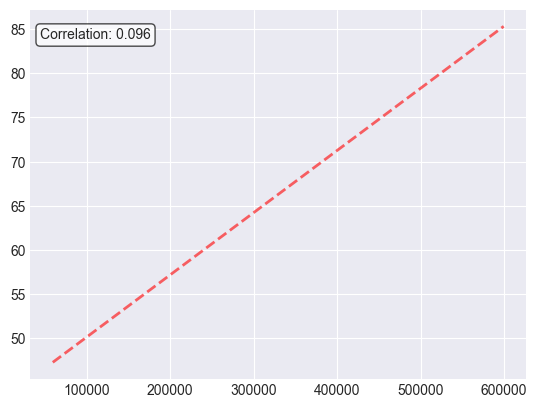

In [95]:
# Simple trend line addition
if 'CustomValueEstimate' in make_stats.columns and 'TotalClaims' in make_stats.columns:
    try:
        # Get valid data
        x_data = make_stats['CustomValueEstimate'].values
        y_data = make_stats['TotalClaims'].values
        
        # Create mask for valid (non-NaN) data
        mask = ~(np.isnan(x_data) | np.isnan(y_data))
        x_valid = x_data[mask]
        y_valid = y_data[mask]
        
        if len(x_valid) > 1:
            # Fit linear regression
            slope, intercept = np.polyfit(x_valid, y_valid, 1)
            
            # Create trend line points
            x_trend = np.array([x_valid.min(), x_valid.max()])
            y_trend = slope * x_trend + intercept
            
            # Plot trend line
            plt.plot(x_trend, y_trend, 'r--', linewidth=2, alpha=0.6, 
                    label=f'Trend: y = {slope:.3f}x + {intercept:.1f}')
            
            # Calculate correlation
            correlation = np.corrcoef(x_valid, y_valid)[0, 1]
            plt.text(0.02, 0.95, f'Correlation: {correlation:.3f}', 
                    transform=plt.gca().transAxes,
                    fontsize=10,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
            
            print(f"Trend line: y = {slope:.3f}x + {intercept:.1f}")
            print(f"Correlation: {correlation:.3f}")
    except Exception as e:
        print(f"Could not add trend line: {e}")

#### Plot 3: Insurance Portfolio Composition Dashboard


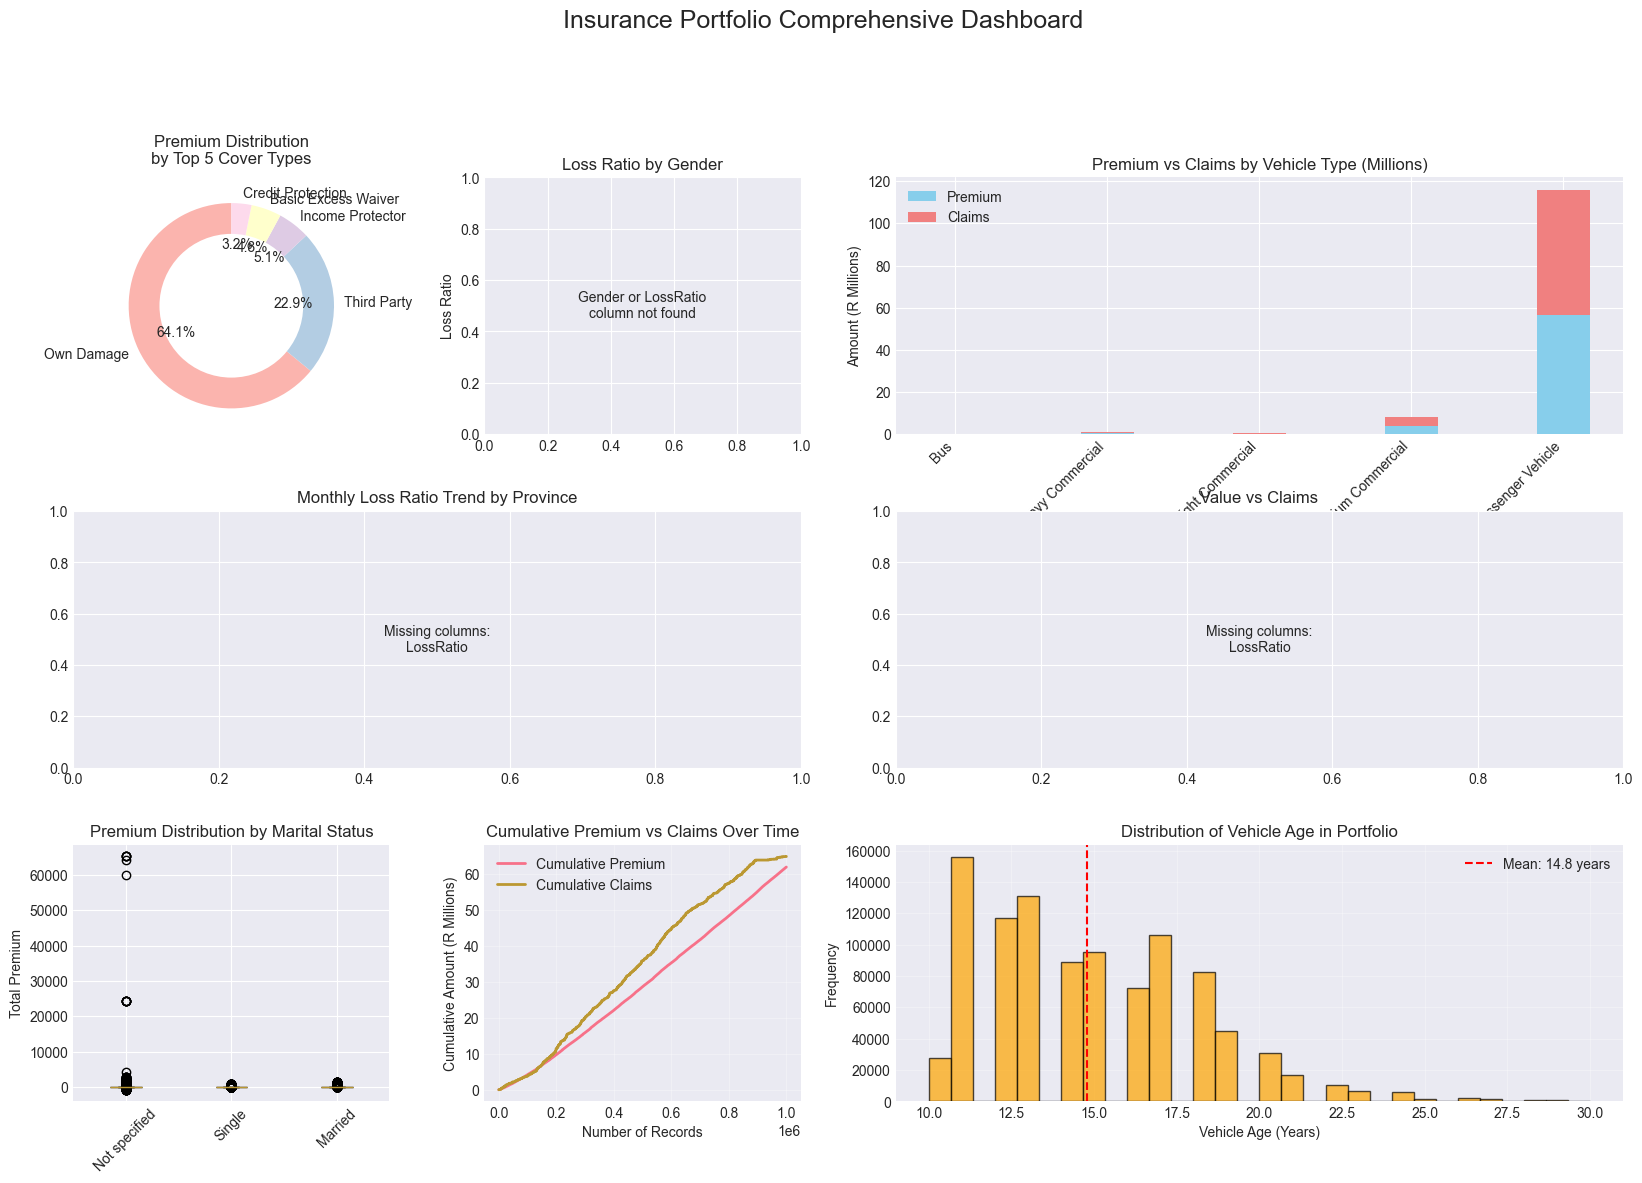

In [98]:
fig = plt.figure(figsize=(20, 12))

# Create grid layout
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Donut Chart - Premium Distribution by Cover Type
ax1 = fig.add_subplot(gs[0, 0])
if 'CoverType' in df.columns:
    cover_premium = df.groupby('CoverType')['TotalPremium'].sum().sort_values(ascending=False).head(5)
    colors = plt.cm.Pastel1(np.arange(len(cover_premium)) / len(cover_premium))
    wedges, texts, autotexts = ax1.pie(cover_premium, labels=cover_premium.index, 
                                       autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.set_title('Premium Distribution\nby Top 5 Cover Types', fontsize=12, pad=10)
    # Make it a donut
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax1.add_artist(centre_circle)

# 2. Bar Chart - Loss Ratio by Gender
ax2 = fig.add_subplot(gs[0, 1])
if 'Gender' in df.columns and 'LossRatio' in df.columns:  # Added check for LossRatio
    gender_loss = df.groupby('Gender')['LossRatio'].mean().sort_values()
    colors = ['lightblue' if x == 'Male' else 'lightpink' for x in gender_loss.index]
    ax2.bar(gender_loss.index, gender_loss.values, color=colors, edgecolor='black')
    ax2.set_title('Loss Ratio by Gender', fontsize=12)
    ax2.set_ylabel('Loss Ratio')
    ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
else:
    ax2.text(0.5, 0.5, 'Gender or LossRatio\ncolumn not found', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=10)
    ax2.set_title('Loss Ratio by Gender', fontsize=12)
    ax2.set_ylabel('Loss Ratio')

# 3. Stacked Bar - Premium vs Claims by Vehicle Type
ax3 = fig.add_subplot(gs[0, 2:])
if 'VehicleType' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    vehicle_data = df.groupby('VehicleType').agg({'TotalPremium': 'sum', 'TotalClaims': 'sum'}).head(8)
    x = range(len(vehicle_data))
    width = 0.35
    ax3.bar(x, vehicle_data['TotalPremium'] / 1e6, width, label='Premium', color='skyblue')
    ax3.bar(x, vehicle_data['TotalClaims'] / 1e6, width, label='Claims', 
            color='lightcoral', bottom=vehicle_data['TotalPremium'] / 1e6)
    ax3.set_xticks(x)
    ax3.set_xticklabels(vehicle_data.index, rotation=45, ha='right')
    ax3.set_title('Premium vs Claims by Vehicle Type (Millions)', fontsize=12)
    ax3.set_ylabel('Amount (R Millions)')
    ax3.legend()
else:
    missing_cols = []
    if 'VehicleType' not in df.columns: missing_cols.append('VehicleType')
    if 'TotalPremium' not in df.columns: missing_cols.append('TotalPremium')
    if 'TotalClaims' not in df.columns: missing_cols.append('TotalClaims')
    ax3.text(0.5, 0.5, f'Missing columns:\n{", ".join(missing_cols)}', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=10)
    ax3.set_title('Premium vs Claims by Vehicle Type', fontsize=12)

# 4. Heatmap - Monthly Loss Ratio Trend
ax4 = fig.add_subplot(gs[1, :2])
if 'TransactionMonth' in df.columns and 'Province' in df.columns and 'LossRatio' in df.columns:
    # Prepare monthly-province data
    try:
        df['YearMonth'] = pd.to_datetime(df['TransactionMonth']).dt.strftime('%Y-%m')
        monthly_province = df.pivot_table(
            index='YearMonth',
            columns='Province',
            values='LossRatio',
            aggfunc='mean'
        )
        sns.heatmap(monthly_province, cmap='RdYlGn_r', ax=ax4, cbar_kws={'label': 'Loss Ratio'})
        ax4.set_title('Monthly Loss Ratio Trend by Province', fontsize=12)
        ax4.set_xlabel('Province')
        ax4.set_ylabel('Month')
    except Exception as e:
        ax4.text(0.5, 0.5, f'Error creating heatmap:\n{str(e)[:50]}...', 
                 ha='center', va='center', transform=ax4.transAxes, fontsize=9)
        ax4.set_title('Monthly Loss Ratio Trend by Province', fontsize=12)
else:
    missing_cols = []
    if 'TransactionMonth' not in df.columns: missing_cols.append('TransactionMonth')
    if 'Province' not in df.columns: missing_cols.append('Province')
    if 'LossRatio' not in df.columns: missing_cols.append('LossRatio')
    ax4.text(0.5, 0.5, f'Missing columns:\n{", ".join(missing_cols)}', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=10)
    ax4.set_title('Monthly Loss Ratio Trend by Province', fontsize=12)

# 5. Scatter - Custom Value vs Claims with Size as Premium
ax5 = fig.add_subplot(gs[1, 2:])
if 'CustomValueEstimate' in df.columns and 'TotalClaims' in df.columns and 'TotalPremium' in df.columns and 'LossRatio' in df.columns:
    try:
        sample_size = min(1000, len(df))
        sample_data = df.sample(sample_size, random_state=42) if len(df) > 1000 else df
        
        scatter = ax5.scatter(
            sample_data['CustomValueEstimate'],
            sample_data['TotalClaims'],
            s=sample_data['TotalPremium'] / 100,  # Size scaled by premium
            c=sample_data['LossRatio'],
            cmap='RdYlGn_r',
            alpha=0.6,
            edgecolors='black',
            linewidth=0.5
        )
        ax5.set_xlabel('Custom Value Estimate')
        ax5.set_ylabel('Total Claims')
        ax5.set_title('Value vs Claims (Size = Premium, Color = Loss Ratio)', fontsize=12)
        plt.colorbar(scatter, ax=ax5, label='Loss Ratio')
        ax5.grid(True, alpha=0.3)
    except Exception as e:
        ax5.text(0.5, 0.5, f'Error creating scatter:\n{str(e)[:50]}...', 
                 ha='center', va='center', transform=ax5.transAxes, fontsize=9)
        ax5.set_title('Value vs Claims', fontsize=12)
else:
    missing_cols = []
    if 'CustomValueEstimate' not in df.columns: missing_cols.append('CustomValueEstimate')
    if 'TotalClaims' not in df.columns: missing_cols.append('TotalClaims')
    if 'TotalPremium' not in df.columns: missing_cols.append('TotalPremium')
    if 'LossRatio' not in df.columns: missing_cols.append('LossRatio')
    ax5.text(0.5, 0.5, f'Missing columns:\n{", ".join(missing_cols)}', 
             ha='center', va='center', transform=ax5.transAxes, fontsize=10)
    ax5.set_title('Value vs Claims', fontsize=12)

# 6. Box Plot - Premium Distribution by Marital Status
ax6 = fig.add_subplot(gs[2, 0])
if 'MaritalStatus' in df.columns and 'TotalPremium' in df.columns:
    try:
        marital_data = [df[df['MaritalStatus'] == status]['TotalPremium'].dropna() 
                        for status in df['MaritalStatus'].value_counts().head(5).index]
        bp = ax6.boxplot(marital_data, patch_artist=True, 
                         labels=df['MaritalStatus'].value_counts().head(5).index,
                         boxprops=dict(facecolor='lightgreen'))
        ax6.set_title('Premium Distribution by Marital Status', fontsize=12)
        ax6.set_ylabel('Total Premium')
        ax6.tick_params(axis='x', rotation=45)
    except Exception as e:
        ax6.text(0.5, 0.5, f'Error creating box plot:\n{str(e)[:50]}...', 
                 ha='center', va='center', transform=ax6.transAxes, fontsize=9)
        ax6.set_title('Premium Distribution by Marital Status', fontsize=12)
else:
    missing_cols = []
    if 'MaritalStatus' not in df.columns: missing_cols.append('MaritalStatus')
    if 'TotalPremium' not in df.columns: missing_cols.append('TotalPremium')
    ax6.text(0.5, 0.5, f'Missing columns:\n{", ".join(missing_cols)}', 
             ha='center', va='center', transform=ax6.transAxes, fontsize=10)
    ax6.set_title('Premium Distribution by Marital Status', fontsize=12)

# 7. Line Chart - Cumulative Premium and Claims Over Time
ax7 = fig.add_subplot(gs[2, 1])
if 'TransactionMonth' in df.columns and 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
    try:
        df_sorted = df.sort_values('TransactionMonth')
        cumulative_premium = df_sorted['TotalPremium'].cumsum() / 1e6
        cumulative_claims = df_sorted['TotalClaims'].cumsum() / 1e6
        
        ax7.plot(range(len(cumulative_premium)), cumulative_premium, label='Cumulative Premium', linewidth=2)
        ax7.plot(range(len(cumulative_claims)), cumulative_claims, label='Cumulative Claims', linewidth=2)
        ax7.set_title('Cumulative Premium vs Claims Over Time', fontsize=12)
        ax7.set_xlabel('Number of Records')
        ax7.set_ylabel('Cumulative Amount (R Millions)')
        ax7.legend()
        ax7.grid(True, alpha=0.3)
    except Exception as e:
        ax7.text(0.5, 0.5, f'Error creating line chart:\n{str(e)[:50]}...', 
                 ha='center', va='center', transform=ax7.transAxes, fontsize=9)
        ax7.set_title('Cumulative Premium vs Claims', fontsize=12)
else:
    missing_cols = []
    if 'TransactionMonth' not in df.columns: missing_cols.append('TransactionMonth')
    if 'TotalPremium' not in df.columns: missing_cols.append('TotalPremium')
    if 'TotalClaims' not in df.columns: missing_cols.append('TotalClaims')
    ax7.text(0.5, 0.5, f'Missing columns:\n{", ".join(missing_cols)}', 
             ha='center', va='center', transform=ax7.transAxes, fontsize=10)
    ax7.set_title('Cumulative Premium vs Claims', fontsize=12)

# 8. Histogram - Age of Vehicles (based on RegistrationYear)
ax8 = fig.add_subplot(gs[2, 2:])
if 'RegistrationYear' in df.columns:
    try:
        current_year = pd.Timestamp.now().year
        df['VehicleAge'] = current_year - df['RegistrationYear']
        vehicle_age_filtered = df['VehicleAge'][(df['VehicleAge'] >= 0) & (df['VehicleAge'] <= 30)]
        
        ax8.hist(vehicle_age_filtered.dropna(), bins=30, edgecolor='black', alpha=0.7, color='orange')
        ax8.set_xlabel('Vehicle Age (Years)')
        ax8.set_ylabel('Frequency')
        ax8.set_title('Distribution of Vehicle Age in Portfolio', fontsize=12)
        ax8.axvline(vehicle_age_filtered.mean(), color='red', linestyle='--', 
                    label=f'Mean: {vehicle_age_filtered.mean():.1f} years')
        ax8.legend()
        ax8.grid(True, alpha=0.3)
    except Exception as e:
        ax8.text(0.5, 0.5, f'Error creating histogram:\n{str(e)[:50]}...', 
                 ha='center', va='center', transform=ax8.transAxes, fontsize=9)
        ax8.set_title('Vehicle Age Distribution', fontsize=12)
else:
    ax8.text(0.5, 0.5, 'RegistrationYear\ncolumn not found', 
             ha='center', va='center', transform=ax8.transAxes, fontsize=10)
    ax8.set_title('Vehicle Age Distribution', fontsize=12)

plt.suptitle('Insurance Portfolio Comprehensive Dashboard', fontsize=18, y=1.02)
plt.tight_layout()

# Create outputs directory if it doesn't exist
import os
os.makedirs('outputs', exist_ok=True)

plt.savefig('outputs/creative_plot3_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [103]:
def generate_summary_insights(df):
    """
    Generate key insights and summary statistics
    """
    summary_data = []
    
    print("=" * 60)
    print("SUMMARY INSIGHTS")
    print("=" * 60)
    
    try:
        # 1. Overall Loss Ratio
        if 'LossRatio' in df.columns:
            overall_loss_ratio = df['LossRatio'].mean()
            summary_data.append(['Overall Loss Ratio', f'{overall_loss_ratio:.2%}'])
            print(f"1. Overall Loss Ratio: {overall_loss_ratio:.2%}")
        else:
            print("⚠️ LossRatio column not found - skipping overall loss ratio")
    
    except Exception as e:
        print(f"❌ Error calculating overall loss ratio: {e}")
    
    try:
        # 2. Loss Ratio by Province
        if 'Province' in df.columns and 'LossRatio' in df.columns:
            province_loss = df.groupby('Province')['LossRatio'].mean().sort_values()
            
            best_province = province_loss.index[0]
            best_ratio = province_loss.iloc[0]
            worst_province = province_loss.index[-1]
            worst_ratio = province_loss.iloc[-1]
            
            summary_data.append(['Best Province (Lowest Loss Ratio)', 
                                f"{best_province}: {best_ratio:.2%}"])
            summary_data.append(['Worst Province (Highest Loss Ratio)', 
                                f"{worst_province}: {worst_ratio:.2%}"])
            
            print(f"2. Best Province: {best_province} ({best_ratio:.2%})")
            print(f"   Worst Province: {worst_province} ({worst_ratio:.2%})")
        else:
            print("⚠️ Province or LossRatio column not found - skipping province analysis")
    
    except Exception as e:
        print(f"❌ Error analyzing provinces: {e}")
    
    try:
        # 3. Loss Ratio by Vehicle Type
        if 'VehicleType' in df.columns and 'LossRatio' in df.columns:
            vehicle_loss = df.groupby('VehicleType')['LossRatio'].mean().sort_values()
            
            best_vehicle = vehicle_loss.index[0]
            best_ratio = vehicle_loss.iloc[0]
            worst_vehicle = vehicle_loss.index[-1]
            worst_ratio = vehicle_loss.iloc[-1]
            
            summary_data.append(['Best Vehicle Type (Lowest Loss Ratio)', 
                                f"{best_vehicle}: {best_ratio:.2%}"])
            summary_data.append(['Worst Vehicle Type (Highest Loss Ratio)', 
                                f"{worst_vehicle}: {worst_ratio:.2%}"])
            
            print(f"3. Best Vehicle Type: {best_vehicle} ({best_ratio:.2%})")
            print(f"   Worst Vehicle Type: {worst_vehicle} ({worst_ratio:.2%})")
        else:
            print("⚠️ VehicleType or LossRatio column not found - skipping vehicle type analysis")
    
    except Exception as e:
        print(f"❌ Error analyzing vehicle types: {e}")
    
    try:
        # 4. Loss Ratio by Gender
        if 'Gender' in df.columns and 'LossRatio' in df.columns:
            gender_loss = df.groupby('Gender')['LossRatio'].mean().sort_values()
            
            for gender, ratio in gender_loss.items():
                summary_data.append([f'Loss Ratio - {gender}', f'{ratio:.2%}'])
            
            print(f"4. Loss Ratio by Gender:")
            for gender, ratio in gender_loss.items():
                print(f"   {gender}: {ratio:.2%}")
        else:
            print("⚠️ Gender or LossRatio column not found - skipping gender analysis")
    
    except Exception as e:
        print(f"❌ Error analyzing gender: {e}")
    
    try:
        # 5. Top/Bottom Vehicle Makes by Claims
        if 'make' in df.columns and 'TotalClaims' in df.columns:
            # Convert to numeric if needed
            df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
            
            # Calculate average claims by make
            make_claims = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
            
            # Filter out makes with insufficient data (optional)
            make_counts = df.groupby('make').size()
            valid_makes = make_counts[make_counts >= 5].index  # At least 5 records
            make_claims = make_claims[make_claims.index.isin(valid_makes)]
            
            if len(make_claims) >= 5:
                top_5_claims = make_claims.head(5)
                bottom_5_claims = make_claims.tail(5)
                
                # Format top 5
                top_formatted = []
                for make, amt in top_5_claims.items():
                    top_formatted.append(f"{make}: R{amt:,.0f}")
                
                # Format bottom 5
                bottom_formatted = []
                for make, amt in bottom_5_claims.items():
                    bottom_formatted.append(f"{make}: R{amt:,.0f}")
                
                summary_data.append(['Top 5 Makes by Average Claims', 
                                    ', '.join(top_formatted)])
                summary_data.append(['Bottom 5 Makes by Average Claims', 
                                    ', '.join(bottom_formatted)])
                
                print(f"5. Top 5 Makes by Average Claims:")
                for make, amt in top_5_claims.items():
                    print(f"   {make}: R{amt:,.0f}")
                
                print(f"\n   Bottom 5 Makes by Average Claims:")
                for make, amt in bottom_5_claims.items():
                    print(f"   {make}: R{amt:,.0f}")
            else:
                print("⚠️ Insufficient makes data for top/bottom analysis")
        else:
            print("⚠️ make or TotalClaims column not found - skipping makes analysis")
    
    except Exception as e:
        print(f"❌ Error analyzing vehicle makes: {e}")
    
    try:
        # 6. Financial Summary
        financial_summary = []
        
        if 'TotalPremium' in df.columns:
            total_premium = df['TotalPremium'].sum()
            avg_premium = df['TotalPremium'].mean()
            financial_summary.append(f"Total Premium: R{total_premium:,.2f}")
            financial_summary.append(f"Average Premium: R{avg_premium:,.2f}")
        
        if 'TotalClaims' in df.columns:
            total_claims = df['TotalClaims'].sum()
            avg_claims = df['TotalClaims'].mean()
            financial_summary.append(f"Total Claims: R{total_claims:,.2f}")
            financial_summary.append(f"Average Claims: R{avg_claims:,.2f}")
        
        if 'TotalPremium' in df.columns and 'TotalClaims' in df.columns:
            net_profit = total_premium - total_claims
            financial_summary.append(f"Net Profit/Loss: R{net_profit:,.2f}")
        
        if financial_summary:
            summary_data.append(['Financial Summary', ' | '.join(financial_summary)])
            print(f"\n6. Financial Summary:")
            for item in financial_summary:
                print(f"   {item}")
    
    except Exception as e:
        print(f"❌ Error in financial summary: {e}")
    
    try:
        # 7. Policy Counts
        policy_counts = []
        
        if 'PolicyID' in df.columns:
            unique_policies = df['PolicyID'].nunique()
            total_records = len(df)
            policy_counts.append(f"Unique Policies: {unique_policies:,}")
            policy_counts.append(f"Total Records: {total_records:,}")
            
            if total_records > 0:
                avg_covers_per_policy = total_records / unique_policies
                policy_counts.append(f"Avg Covers per Policy: {avg_covers_per_policy:.1f}")
        
        if policy_counts:
            summary_data.append(['Policy Statistics', ' | '.join(policy_counts)])
            print(f"\n7. Policy Statistics:")
            for item in policy_counts:
                print(f"   {item}")
    
    except Exception as e:
        print(f"❌ Error in policy statistics: {e}")
    
    # Convert to DataFrame for nice display
    if summary_data:
        summary_df = pd.DataFrame(summary_data, columns=['Metric', 'Value'])
        
        print("\n" + "=" * 60)
        print("COMPLETE SUMMARY TABLE")
        print("=" * 60)
        display(summary_df)
        
        # Save to CSV
        summary_df.to_csv('outputs/summary_insights.csv', index=False)
        print("\n✓ Summary saved to 'outputs/summary_insights.csv'")
        
        return summary_df
    else:
        print("\n❌ No summary data generated")
        return None

# Run the function
summary_df = generate_summary_insights(df)

SUMMARY INSIGHTS
⚠️ LossRatio column not found - skipping overall loss ratio
⚠️ Province or LossRatio column not found - skipping province analysis
⚠️ VehicleType or LossRatio column not found - skipping vehicle type analysis
⚠️ Gender or LossRatio column not found - skipping gender analysis
5. Top 5 Makes by Average Claims:
   SUZUKI                             : R420
   JMC                                : R192
   HYUNDAI: R174
   MARCOPOLO: R157
   AUDI: R138

   Bottom 5 Makes by Average Claims:
   OPEL: R0
   RENAULT: R0
   SCANIA: R0
   TATA: R0
   VOLVO: R0

6. Financial Summary:
   Total Premium: R61,911,562.70
   Average Premium: R61.91
   Total Claims: R64,867,546.17
   Average Claims: R64.86
   Net Profit/Loss: R-2,955,983.47

7. Policy Statistics:
   Unique Policies: 7,000
   Total Records: 1,000,098
   Avg Covers per Policy: 142.9

COMPLETE SUMMARY TABLE


,Metric,Value
0,Top 5 Makes by Average Claims,"SUZUKI : R420, JMC..."
1,Bottom 5 Makes by Average Claims,"OPEL: R0, RENAULT: R0, SCANIA: R0, TATA: R0, V..."
2,Financial Summary,"Total Premium: R61,911,562.70 | Average Premiu..."
3,Policy Statistics,"Unique Policies: 7,000 | Total Records: 1,000,..."



✓ Summary saved to 'outputs/summary_insights.csv'
